In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import obspy
import pickle
import os


In [2]:
sns.set_context('notebook')
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined.csv')

In [4]:
in_both = combined[(combined['isc_magnitude'] > 0) & (combined['scardec_magnitude'] > 0)]

In [7]:

isc_save_path = '/home/earthquakes1/homes/Rebecca/phd/stf/data/isc/'
scardec_save_path = '/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/'

def load_isc(eq_id):

    event = obspy.read_events(f'{isc_save_path}{eq_id}/{eq_id}.xml', format="QUAKEML")

    with open(f'{isc_save_path}{eq_id}/{eq_id}.txt', 'rb') as f:
        stf_list = pickle.load(f)
    with open(f'{isc_save_path}{eq_id}/{eq_id}_norm_info.txt', 'rb') as f:
        norm_dict = pickle.load(f)

    return event, stf_list, norm_dict

def load_scardec(scardec_name):

    time_moy = []
    momentrate_moy = []
    time_opt = []
    momentrate_opt = []

    event = os.listdir(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}')
    starts = [n for n, l in enumerate(event) if l.startswith('fctmoy')]

    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    #print(lines)
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        #print(split)
        time_moy.append(float(split[0]))
        momentrate_moy.append(float(split[1]))

    starts = [n for n, l in enumerate(event) if l.startswith('fctopt')]

    with open(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/scardec/{scardec_name}/{event[starts[0]]}') as f:
        lines = f.read().splitlines()

    lines = lines[2:]
    #print(lines)
    for line in lines:
        split = line.split(' ')
        split = [s for s in split if s not in ['', ' ', '\n']]
        #print(split)
        time_opt.append(float(split[0]))
        momentrate_opt.append(float(split[1]))

    return time_moy, momentrate_moy, time_opt, momentrate_opt




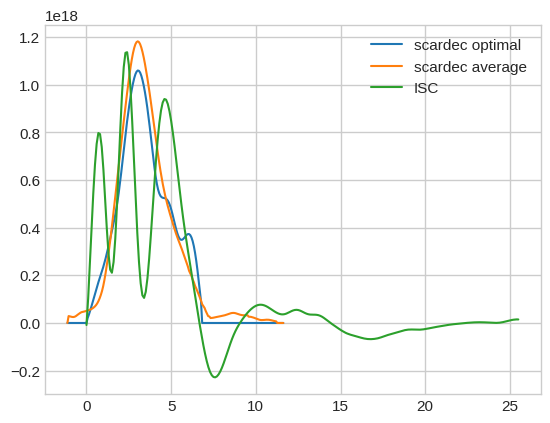

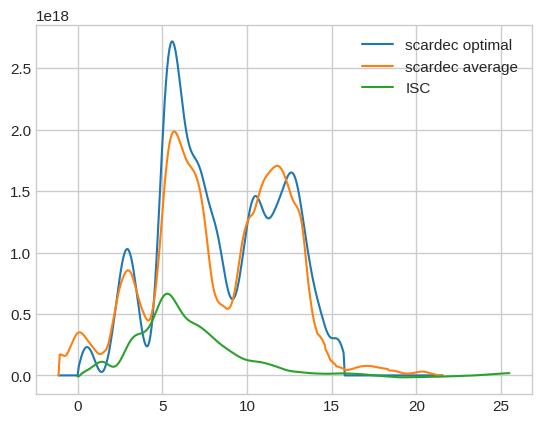

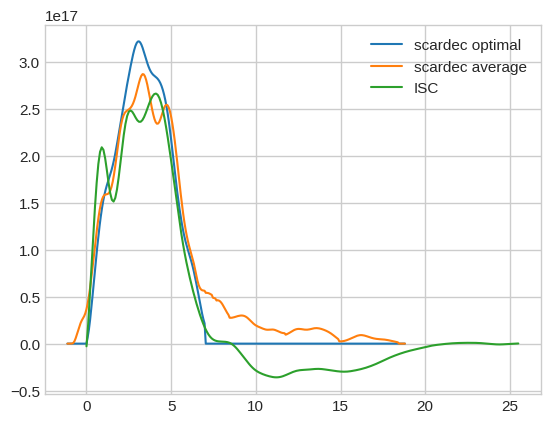

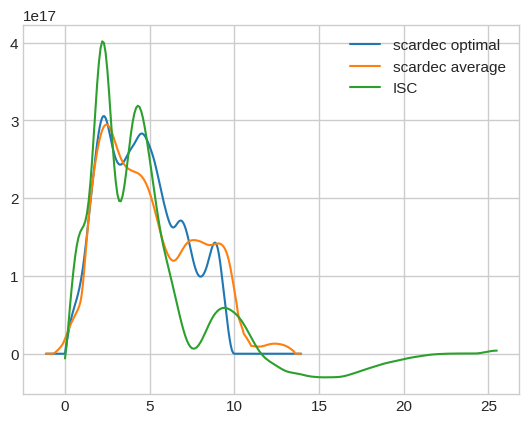

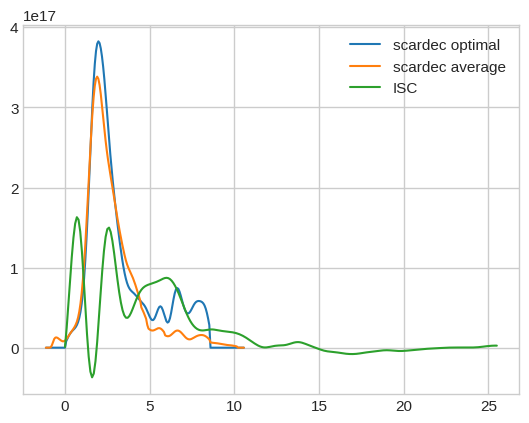

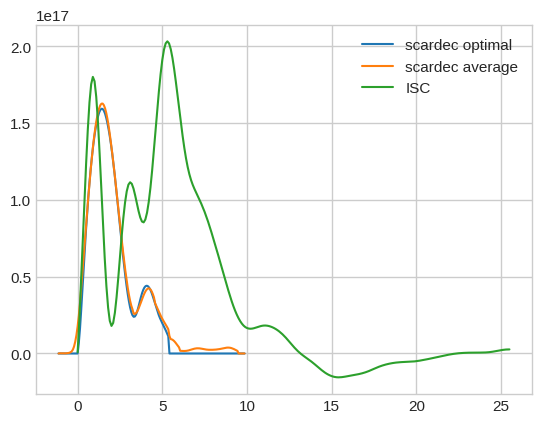

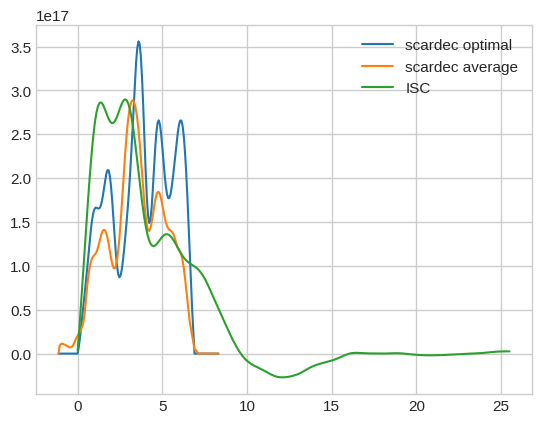

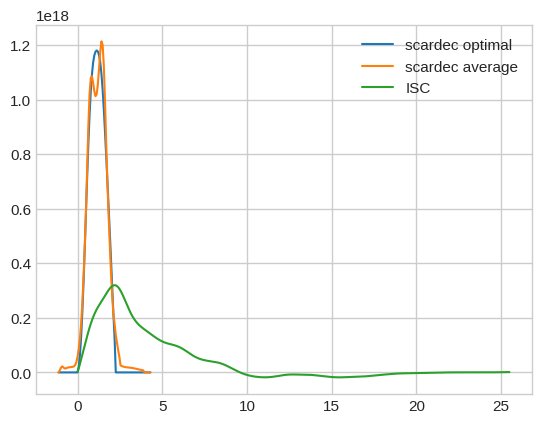

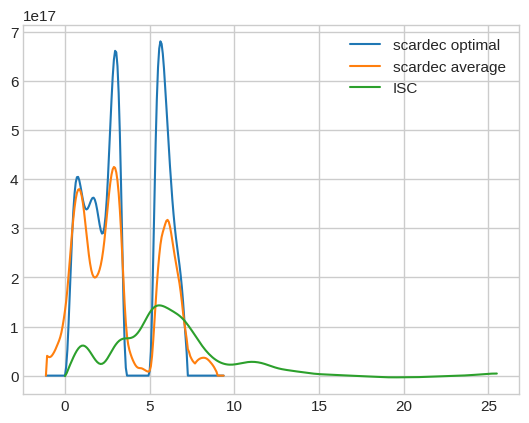

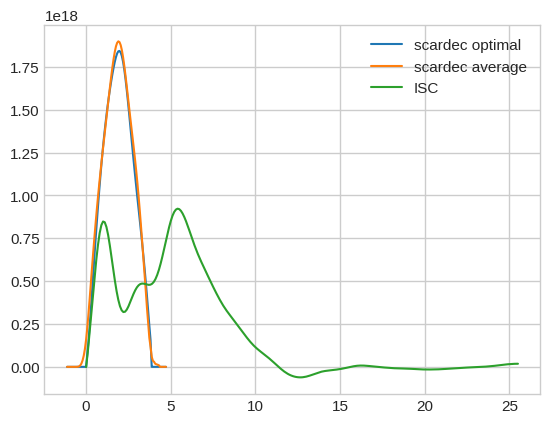

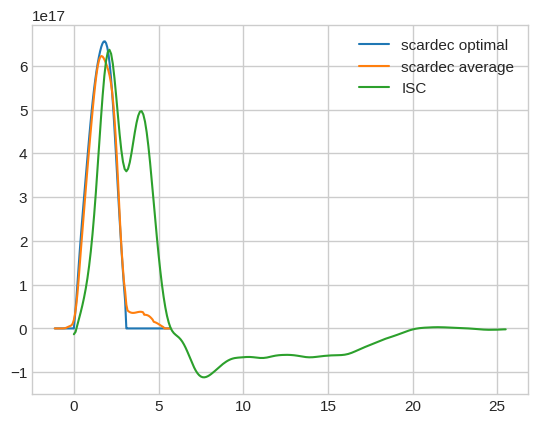

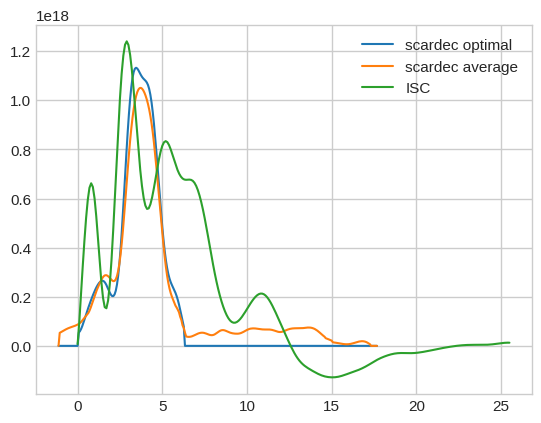

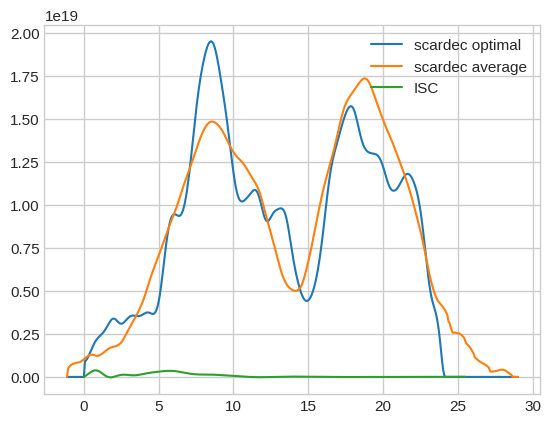

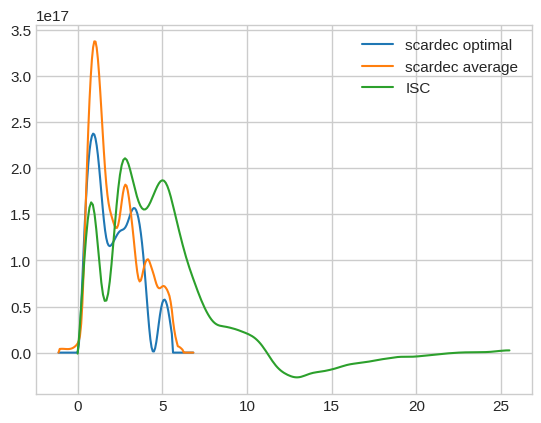

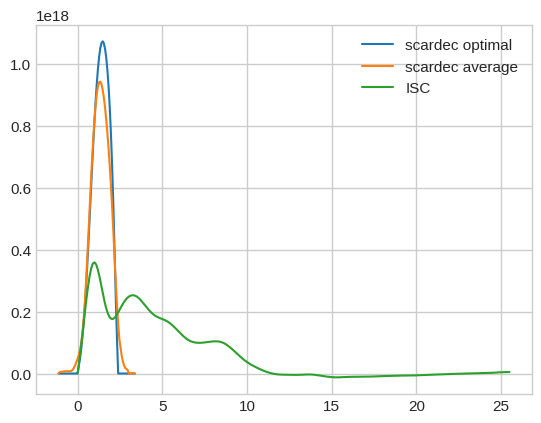

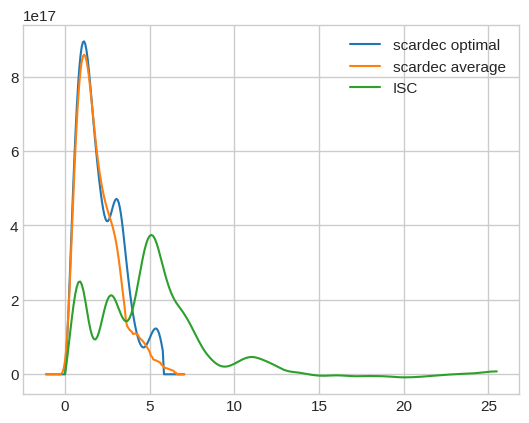

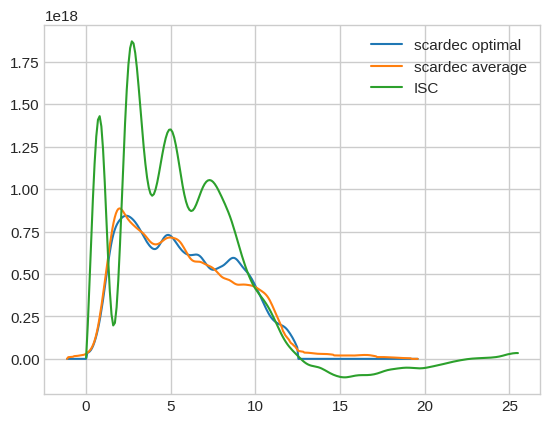

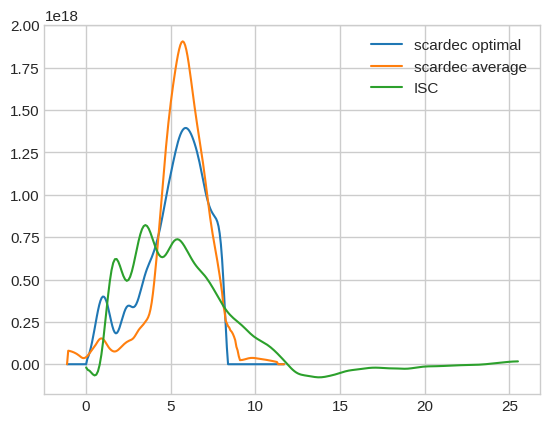

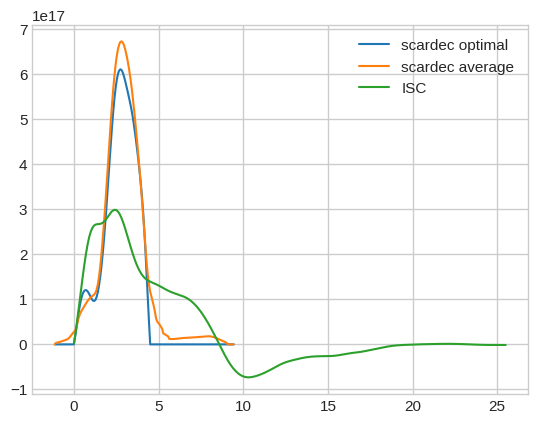

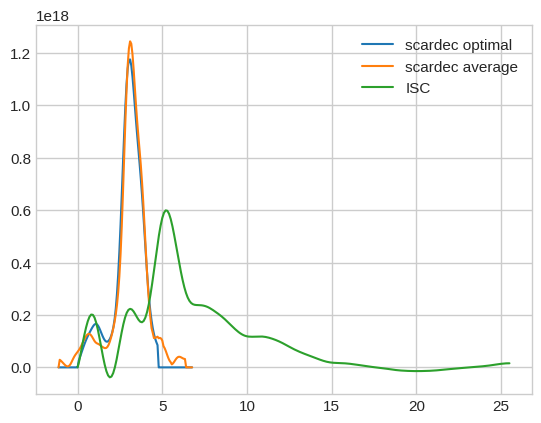

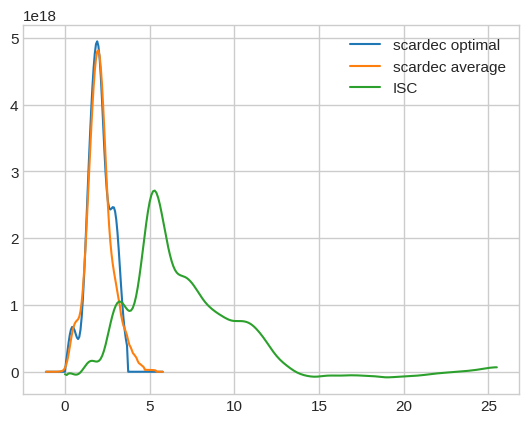

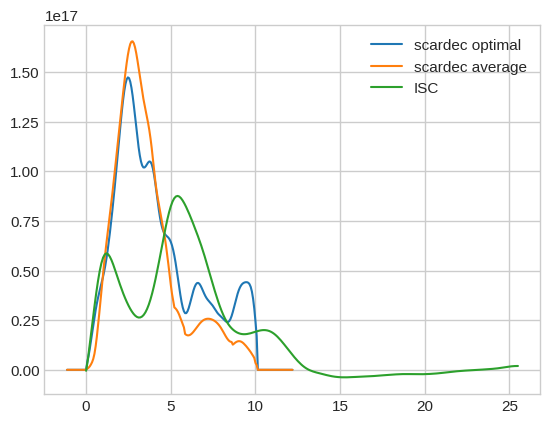

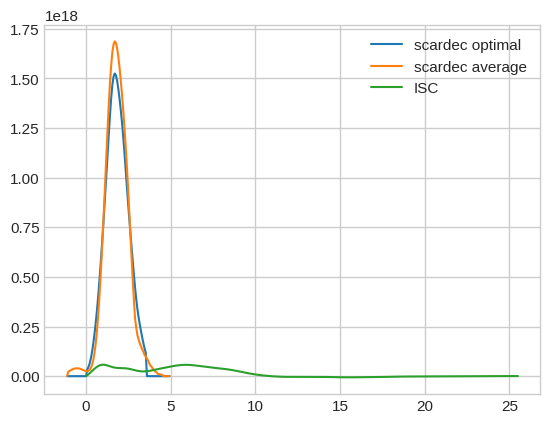

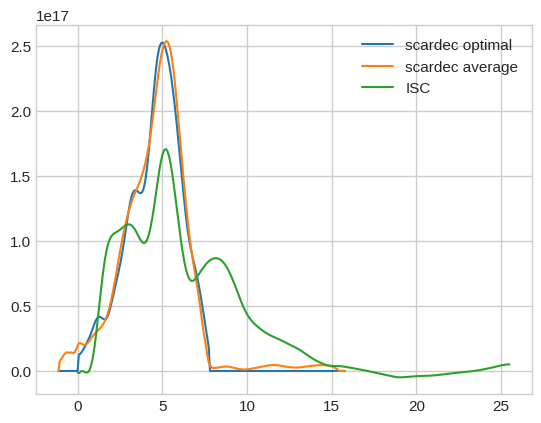

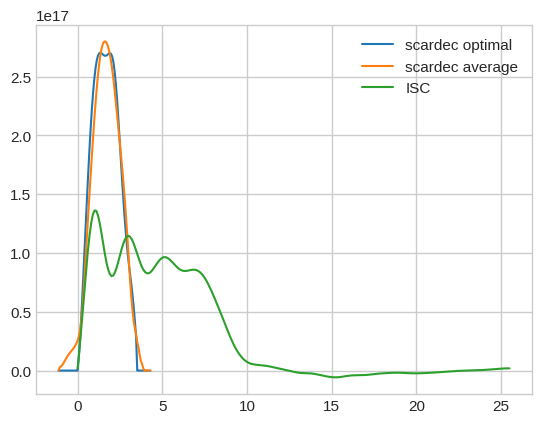

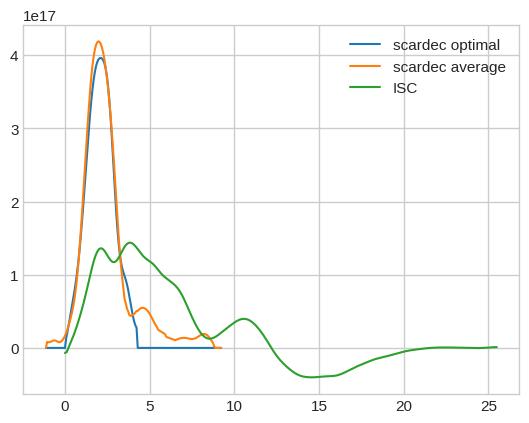

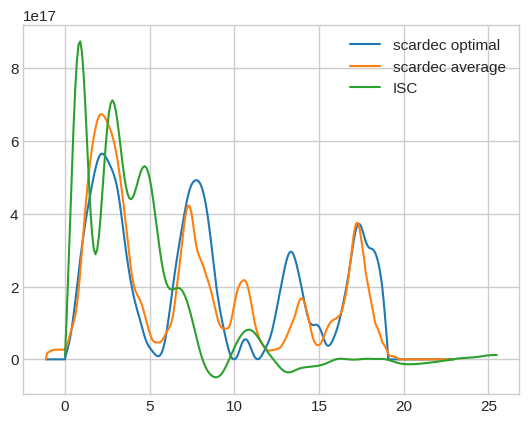

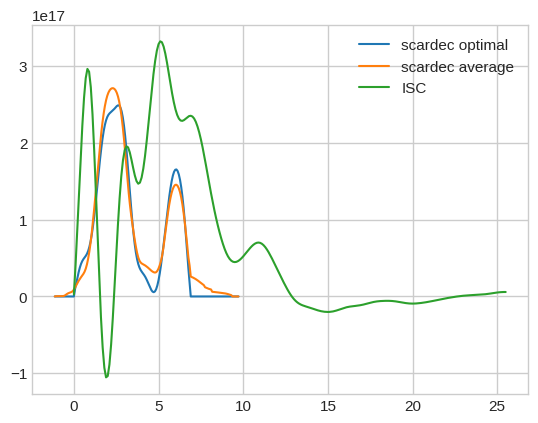

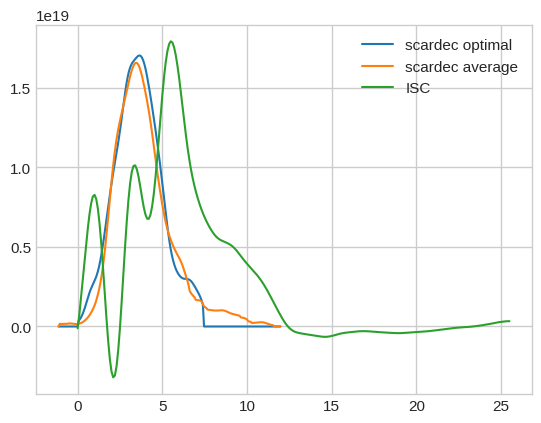

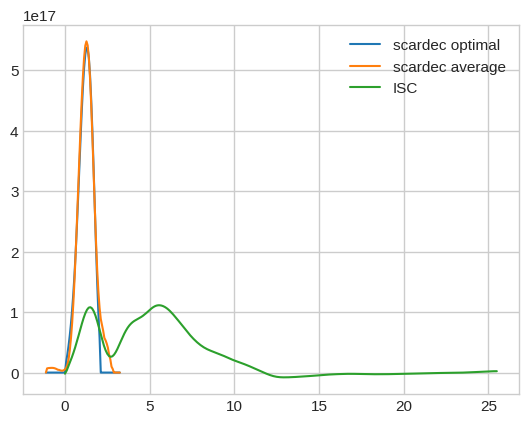

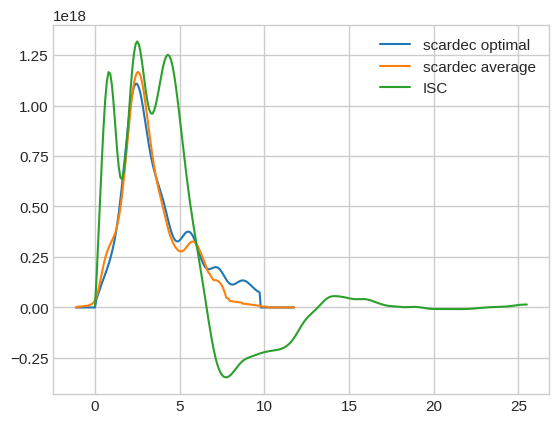

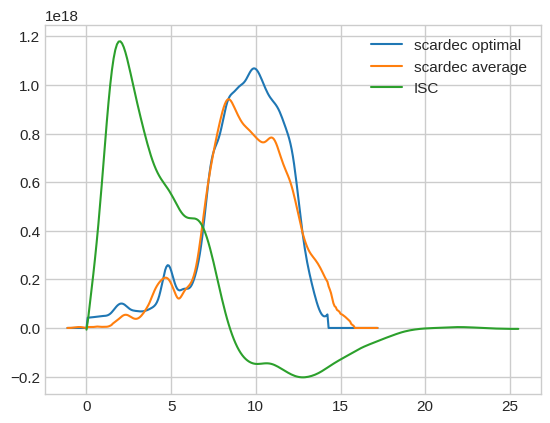

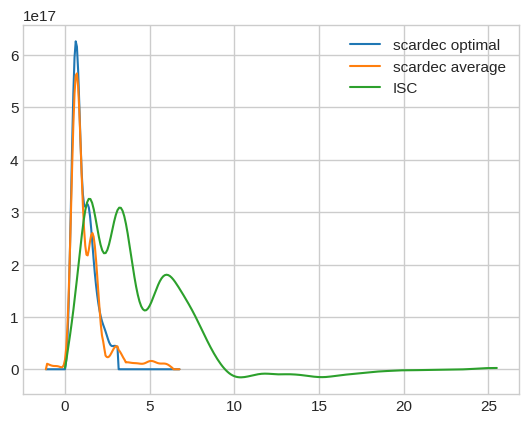

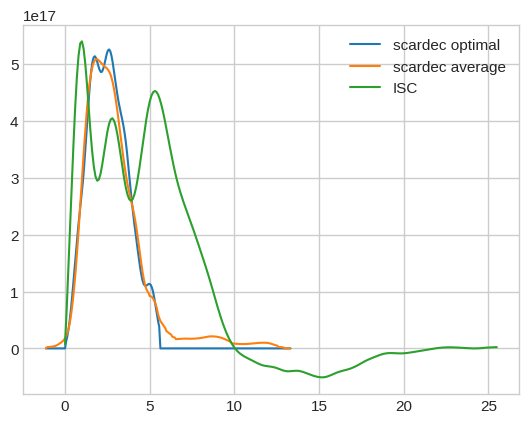

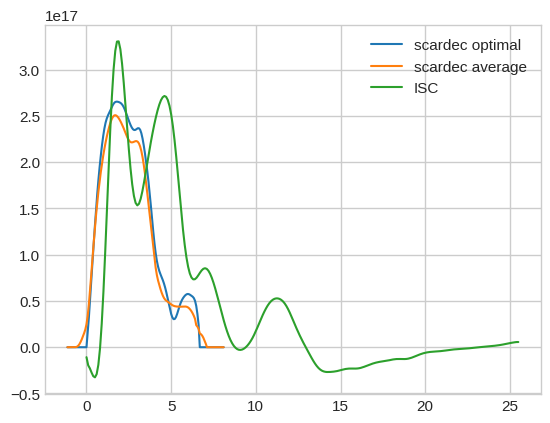

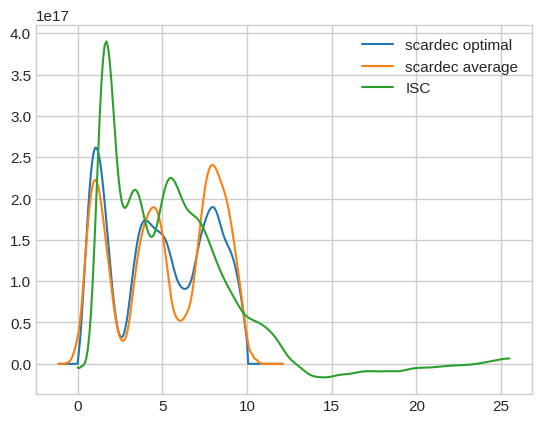

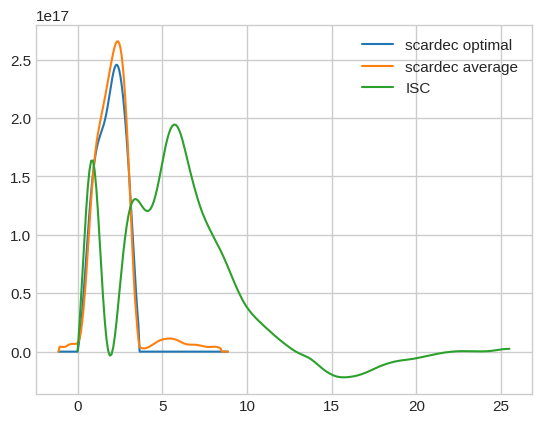

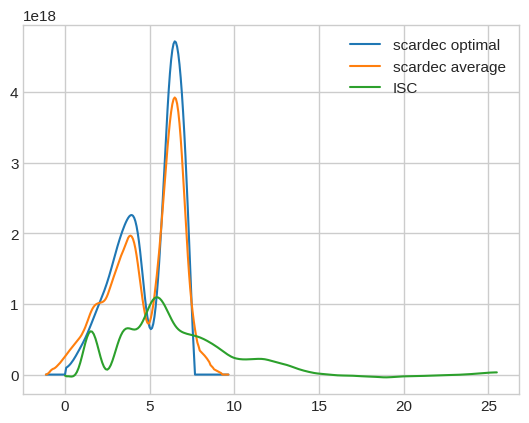

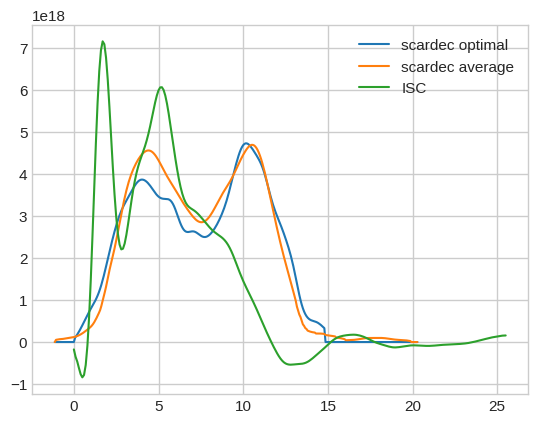

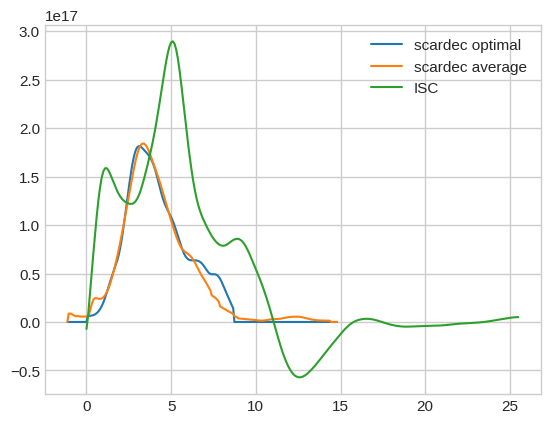

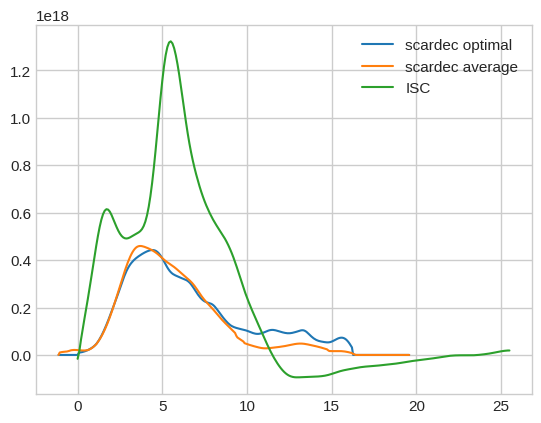

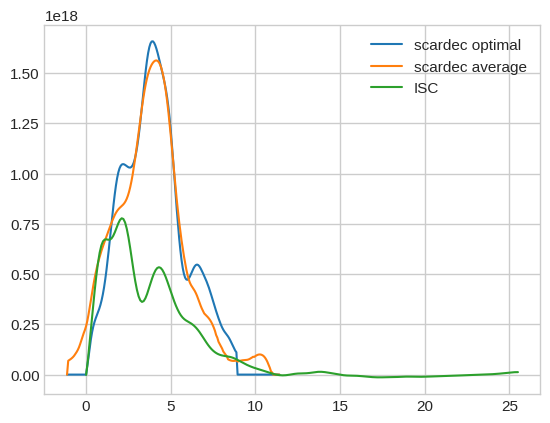

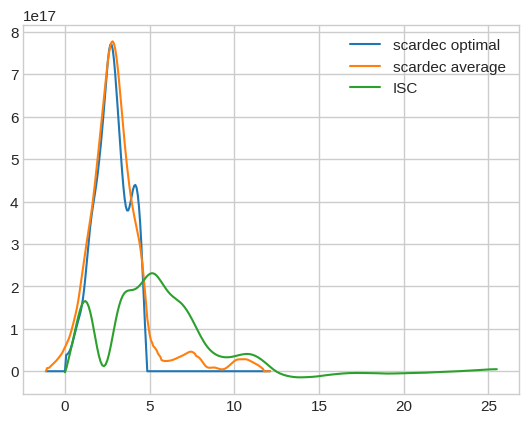

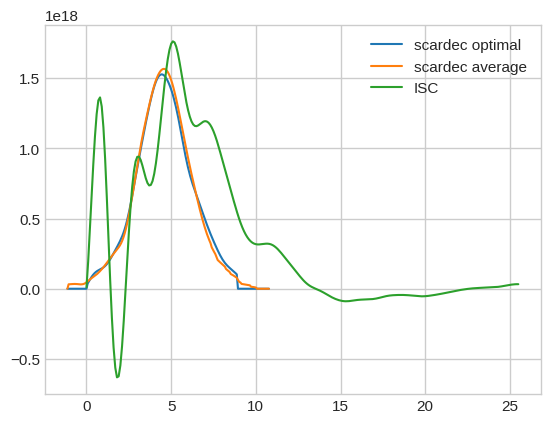

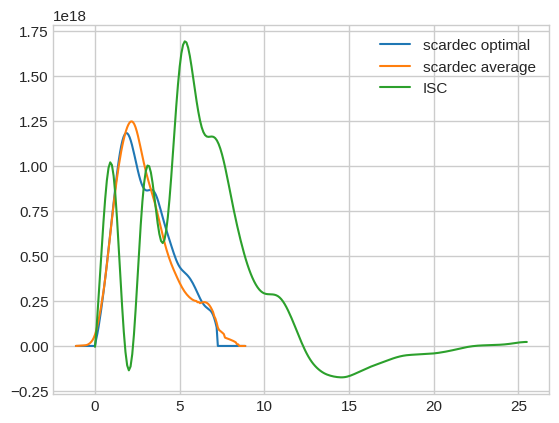

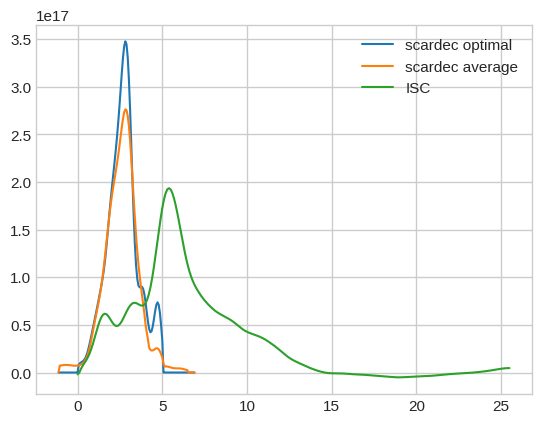

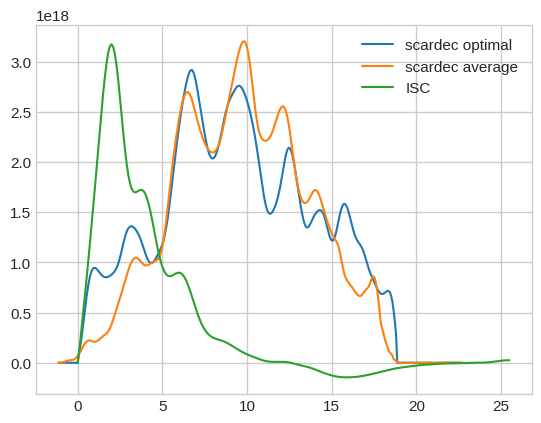

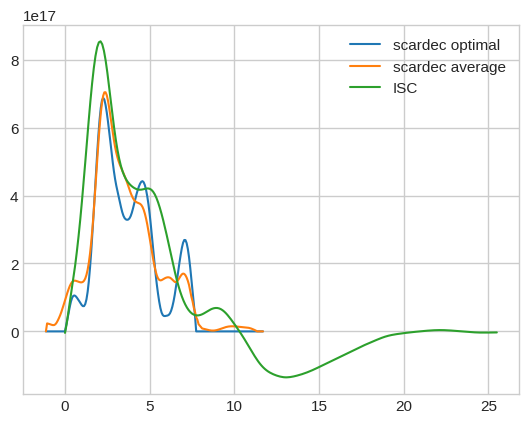

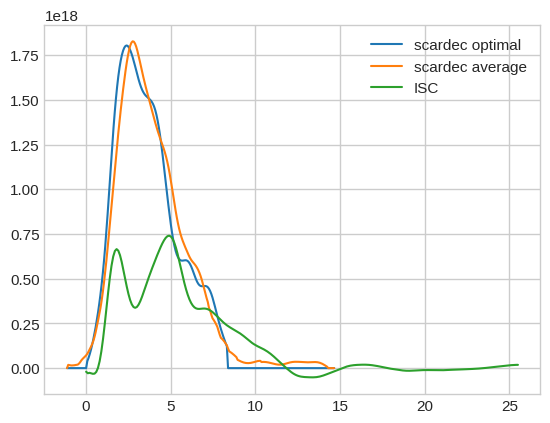

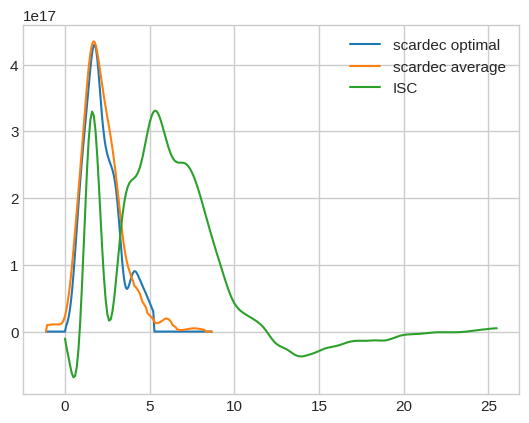

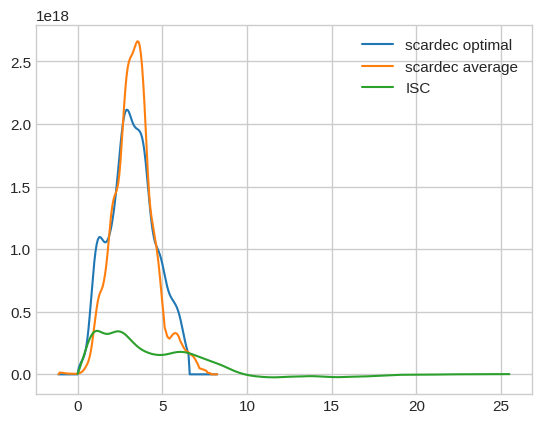

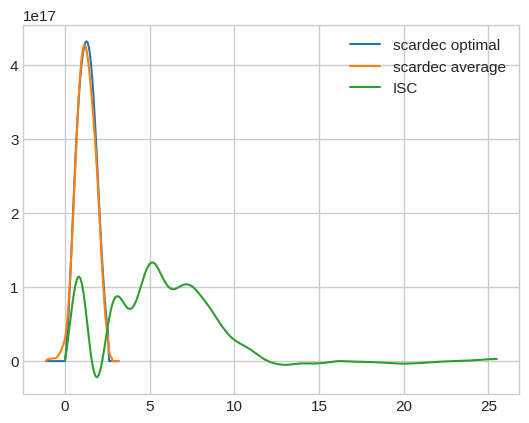

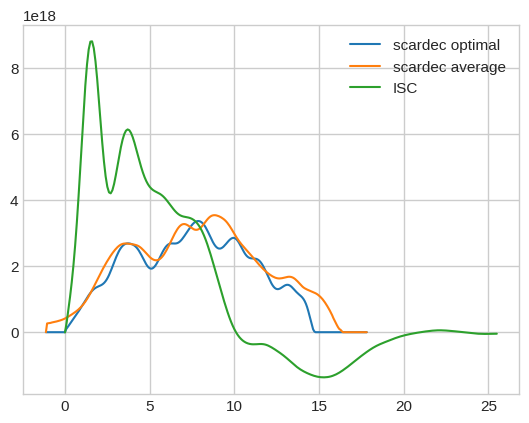

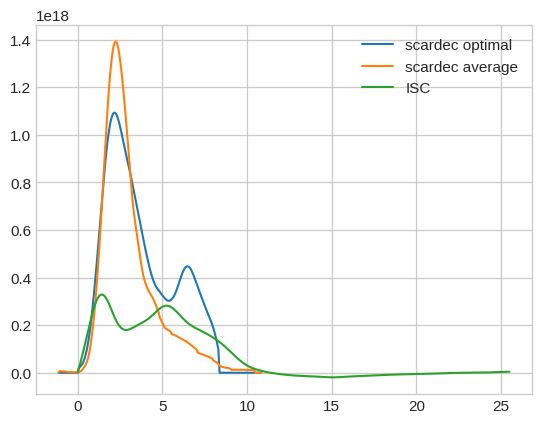

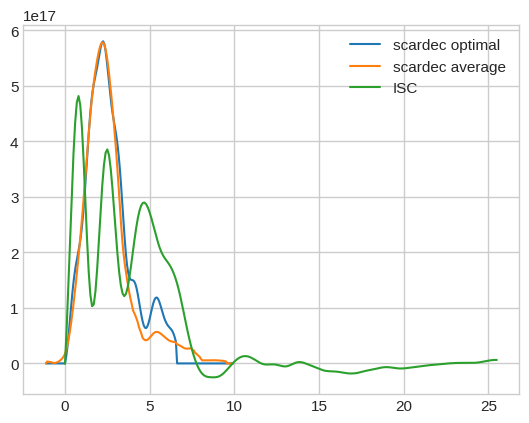

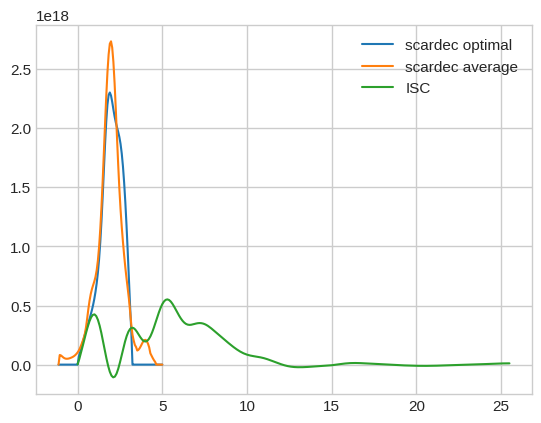

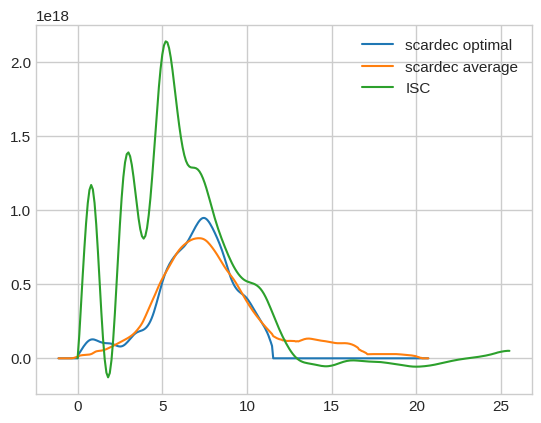

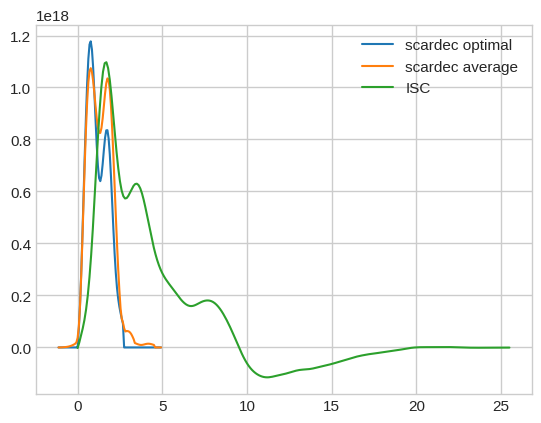

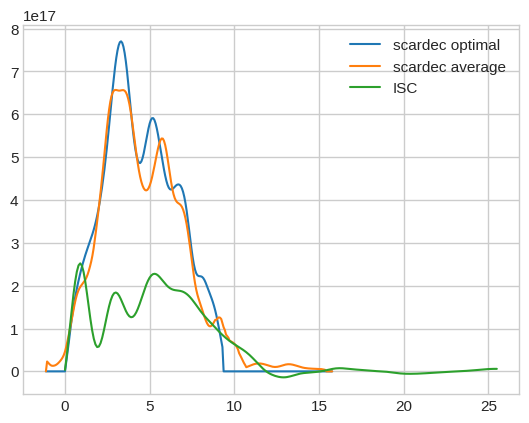

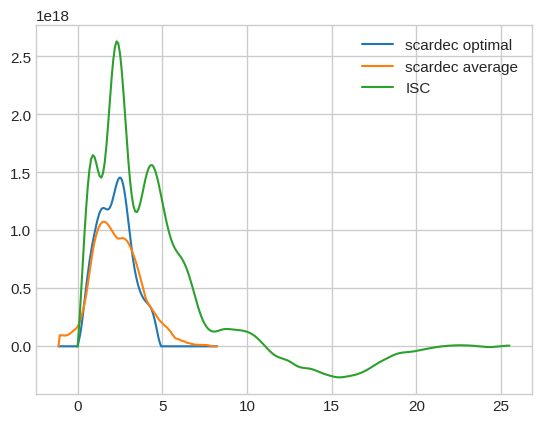

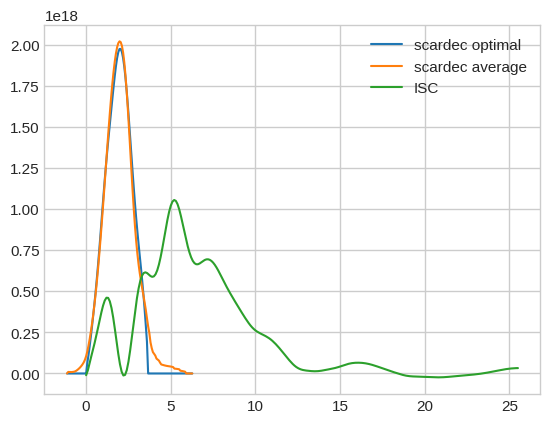

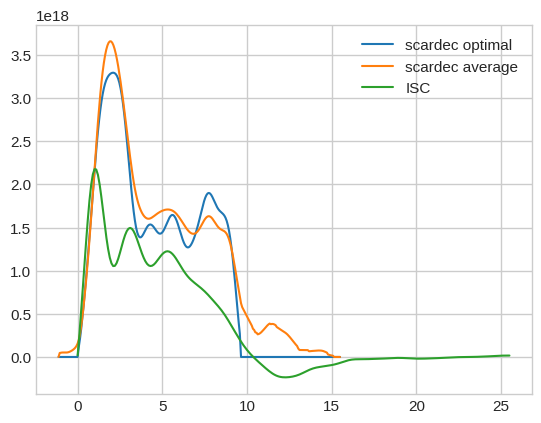

In [9]:
for index, row in in_both.iterrows():
    #print(row)
    time_moy, momentrate_moy, time_opt, momentrate_opt = load_scardec(row.scardec_name)
    plt.plot(time_opt, momentrate_opt, label='scardec optimal')
    plt.plot(time_moy, momentrate_moy, label='scardec average')

    event, stf_list, norm_dict = load_isc(int(row.isc_name))
    if stf_list != []:
        plt.plot(np.arange(0, 25.6, 0.1), np.array(stf_list)*norm_dict['mo_norm']*10**8, label='ISC')
        plt.legend()
        plt.show()
    else:
        plt.close()


In [ ]:
event, stf_list, norm_dict

(1 Event(s) in Catalog:
2020-12-27T21:39:15.340000Z | -39.349,  -74.987 | 6.7  MW | manual,
 [],
 None)